In [13]:
import nltk
import pandas as pd
import numpy as np
import json
from collections import Counter
import re, string, unicodedata

from nltk import FreqDist

import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns 
import sklearn.manifold #For a manifold plot
import json #For API responses
import urllib.parse #For joining urls

import spacy

#Displays the graphs
import graphviz #You also need to install the command line graphviz

#These are from the standard library
import os.path
import zipfile
import subprocess
import io
import tempfile

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook
%matplotlib inline

In [19]:
try:
    nlp = spacy.load("en")
except OSError:
    nlp = spacy.load("en_core_web_sm")

In [3]:
%store -r tweets_df

In [10]:
tweets_df

,id,date,time,username,tweet,hashtags,tokenized_tweet,normalized_tokens
0,1363921515922796547,2021-02-22,13:40:04,cdcgov,covid 19 and flu can both cause fever and cou...,"[dyk, covid19]","[covid, 19, and, flu, can, both, cause, fever,...","[covid, flu, cause, fever, cough, shortness, b..."
1,1363885801755533313,2021-02-22,11:18:09,cdcgov,a new looks at in georgia elementary schools t...,[covid19],"[a, new, looks, at, in, georgia, elementary, s...","[new, look, georgia, elementary, school, study..."
2,1362865816765661190,2021-02-19,15:45:06,cdcgov,officials are concerned about 3 variants detec...,[covid19],"[officials, are, concerned, about, 3, variants...","[official, concern, variant, detect, u, s, b, ..."
3,1362849192130080772,2021-02-19,14:39:02,cdcgov,getting a vaccine is important for adults with...,[covid19],"[getting, a, vaccine, is, important, for, adul...","[get, vaccine, important, adult, certain, heal..."
4,1362510972162867206,2021-02-18,16:15:04,cdcgov,you need two mrna vaccine doses to get the mo...,"[dyk, covid19]","[you, need, two, mrna, vaccine, doses, to, get...","[need, mrna, vaccine, dose, protection, covid,..."
...,...,...,...,...,...,...,...,...
426,1233891883195211780,2020-02-29,18:08:44,cdcgov,reports of community spread of in california o...,[covid19],"[reports, of, community, spread, of, in, calif...","[report, community, spread, california, oregon..."
427,1233891113628557313,2020-02-29,18:05:40,cdcgov,cdc amp also reported 2 ppl have tested positi...,[covid],"[cdc, amp, also, reported, 2, ppl, have, teste...","[cdc, amp, report, ppl, test, positive, hospit..."
428,1233891108654108672,2020-02-29,18:05:39,cdcgov,today and cdc reported the death of a person w...,"[covid, coronavirus]","[today, and, cdc, reported, the, death, of, a,...","[today, cdc, report, death, person, hospitaliz..."
429,1233486735578976257,2020-02-28,15:18:49,cdcgov,cdc does not currently recommend the general p...,"[covid19, ppe]","[cdc, does, not, currently, recommend, the, ge...","[cdc, currently, recommend, general, public, u..."


In [12]:
#.sum() adds together the lists from each row into a single list
tweetscfdist = nltk.ConditionalFreqDist(((len(w), w) for w in tweets_df['normalized_tokens'].sum()))

#print the number of words
print(tweetscfdist.N())

8103


In [24]:
tweetscpdist = nltk.ConditionalProbDist(tweetscfdist, nltk.ELEProbDist)

#print the most common 3-16 letter word, and their probabilities
for i in range(3, 17):
    print(i)
    print(tweetscpdist[i].max())
    print(tweetscpdist[i].prob(tweetscpdist[i].max()))

3
amp
0.1541994750656168
4
case
0.055755894590846046
5
covid
0.2909457900807382
6
spread
0.116796875
7
vaccine
0.10963455149501661
8
forecast
0.05538648813146683
9
community
0.09978070175438597
10
healthcare
0.08113207547169811
11
information
0.13059701492537312
12
asymptomatic
0.08387096774193549
13
administrator
0.19318181818181818
14
recommendation
0.5740740740740741
15
hospitalization
1.0
16
disproportionate
1.0


In [17]:
def spacy_pos(word_list):
    tags = []
    doc = nlp(word_list.lower())
    for w in doc:
        tags.append((w.text, w.tag_))
    return tags

In [20]:
tweets_df['normalized_tokens_POS'] = [spacy_pos(t) for t in tweets_df['tweet']]

In [21]:
tweets_df

,id,date,time,username,tweet,hashtags,tokenized_tweet,normalized_tokens,normalized_tokens_POS
0,1363921515922796547,2021-02-22,13:40:04,cdcgov,covid 19 and flu can both cause fever and cou...,"[dyk, covid19]","[covid, 19, and, flu, can, both, cause, fever,...","[covid, flu, cause, fever, cough, shortness, b...","[( , _SP), (covid, NNP), (19, CD), (and, CC), ..."
1,1363885801755533313,2021-02-22,11:18:09,cdcgov,a new looks at in georgia elementary schools t...,[covid19],"[a, new, looks, at, in, georgia, elementary, s...","[new, look, georgia, elementary, school, study...","[(a, DT), (new, JJ), (looks, NNS), (at, IN), (..."
2,1362865816765661190,2021-02-19,15:45:06,cdcgov,officials are concerned about 3 variants detec...,[covid19],"[officials, are, concerned, about, 3, variants...","[official, concern, variant, detect, u, s, b, ...","[(officials, NNS), (are, VBP), (concerned, JJ)..."
3,1362849192130080772,2021-02-19,14:39:02,cdcgov,getting a vaccine is important for adults with...,[covid19],"[getting, a, vaccine, is, important, for, adul...","[get, vaccine, important, adult, certain, heal...","[(getting, VBG), (a, DT), (vaccine, NN), (is, ..."
4,1362510972162867206,2021-02-18,16:15:04,cdcgov,you need two mrna vaccine doses to get the mo...,"[dyk, covid19]","[you, need, two, mrna, vaccine, doses, to, get...","[need, mrna, vaccine, dose, protection, covid,...","[( , _SP), (you, PRP), (need, VBP), (two, CD),..."
...,...,...,...,...,...,...,...,...,...
426,1233891883195211780,2020-02-29,18:08:44,cdcgov,reports of community spread of in california o...,[covid19],"[reports, of, community, spread, of, in, calif...","[report, community, spread, california, oregon...","[(reports, NNS), (of, IN), (community, NN), (s..."
427,1233891113628557313,2020-02-29,18:05:40,cdcgov,cdc amp also reported 2 ppl have tested positi...,[covid],"[cdc, amp, also, reported, 2, ppl, have, teste...","[cdc, amp, report, ppl, test, positive, hospit...","[(cdc, NNP), (amp, NNP), (also, RB), (reported..."
428,1233891108654108672,2020-02-29,18:05:39,cdcgov,today and cdc reported the death of a person w...,"[covid, coronavirus]","[today, and, cdc, reported, the, death, of, a,...","[today, cdc, report, death, person, hospitaliz...","[(today, NN), (and, CC), (cdc, NNP), (reported..."
429,1233486735578976257,2020-02-28,15:18:49,cdcgov,cdc does not currently recommend the general p...,"[covid19, ppe]","[cdc, does, not, currently, recommend, the, ge...","[cdc, currently, recommend, general, public, u...","[(cdc, NNP), (does, VBZ), (not, RB), (currentl..."


In [32]:
tweetscfdist_WordtoPOS = nltk.ConditionalFreqDist(tweets_df['normalized_tokens_POS'].sum())
tweetscfdist_POStoWord = nltk.ConditionalFreqDist((p, w) for w, p in tweets_df['normalized_tokens_POS'].sum())
tweetscfdist_POStoWord['JJ'].most_common(5) # top 5 adjectives

[('covid', 290), ('new', 102), ('national', 27), ('sick', 25), ('many', 25)]

In [30]:
tweetscfdist_POStoWord['NN']

FreqDist({'spread': 100, 'amp': 76, 'vaccine': 64, 'health': 58, 'update': 46, 'risk': 44, 'mask': 40, 'week': 37, 'call': 35, 'report': 34, ...})

In [31]:
tweetscfdist_POStoWord['VB']

FreqDist({'be': 71, 'help': 68, 'learn': 54, 'protect': 36, 'have': 33, 'slow': 32, 'prevent': 27, 'stay': 26, 'wear': 23, 'spread': 23, ...})

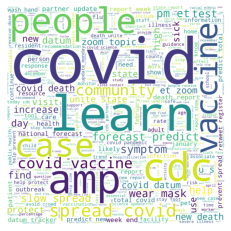

In [140]:
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 3000, height = 3000, mode ='RGBA', scale=.5).generate(' '.join(tweets_df['normalized_tokens'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("covid_tweets_word_cloud.pdf", format = 'pdf')

In [42]:
def sent_tokenize(word_list):
    doc = nlp(word_list)
    sentences = [sent.string.strip() for sent in doc.sents]
    return sentences

In [44]:
def word_tokenize(word_list, model=nlp, MAX_LEN=1500000):   
    tokenized = []
    if type(word_list) == list and len(word_list) == 1:
        word_list = word_list[0]

    if type(word_list) == list:
        word_list = ' '.join([str(elem) for elem in word_list]) 
    # since we're only tokenizing, I remove RAM intensive operations and increase max text size

    model.max_length = MAX_LEN
    doc = model(word_list, disable=["parser", "tagger", "ner"])
    
    for token in doc:
        if not token.is_punct and len(token.text.strip()) > 0:
            tokenized.append(token.text)
    return tokenized

In [45]:
tweets_df['sentences'] = tweets_df['tweet'].apply(lambda x: [word_tokenize(s) for s in sent_tokenize(x)])

In [46]:
def tag_sents_pos(sentences):
    """
    function which replicates NLTK pos tagging on sentences.
    """
    new_sents = []
    for sentence in sentences:
        new_sent = ' '.join(sentence)
        new_sents.append(new_sent)
    final_string = ' '.join(new_sents)
    doc = nlp(final_string)
    
    pos_sents = []
    for sent in doc.sents:
        pos_sent = []
        for token in sent:
            pos_sent.append((token.text, token.tag_))
        pos_sents.append(pos_sent)
    
    return pos_sents

In [47]:
tweets_df['POS_sents'] = tweets_df['sentences'].apply(lambda x: tag_sents_pos(x))

In [175]:
#count the number of VB (verbs)
countTarget = 'VB'
targetCounts = {}
for entry in tweets_df['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
verb_noun_sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
verb_noun_sortedTargets[:20]

[('be', 71),
 ('help', 68),
 ('learn', 54),
 ('protect', 36),
 ('have', 33),
 ('slow', 32),
 ('prevent', 27),
 ('stay', 26),
 ('wear', 23),
 ('spread', 23),
 ('take', 19),
 ('get', 17),
 ('know', 16),
 ('see', 15),
 ('stop', 14),
 ('reduce', 13),
 ('keep', 12),
 ('wash', 11),
 ('join', 10),
 ('make', 9)]

In [172]:
#count the number of NN (nouns)
countTarget = 'NN'
targetCounts = {}
for entry in tweets_df['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
noun_sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
noun_sortedTargets[:20]

[('spread', 100),
 ('amp', 76),
 ('vaccine', 64),
 ('health', 58),
 ('update', 46),
 ('risk', 44),
 ('pm', 41),
 ('mask', 40),
 ('week', 37),
 ('call', 35),
 ('report', 34),
 ('community', 29),
 ('pandemic', 28),
 ('contact', 26),
 ('total', 26),
 ('virus', 26),
 ('illness', 25),
 ('cdcs', 24),
 ('zoom', 24),
 ('care', 22)]

In [156]:
def get_modify_word(NTarget, Word):
    NResults = set()
    for entry in tweets_df['POS_sents']:
        for sentence in entry:
            for (ent1, kind1),(ent2,kind2) in zip(sentence[:-2], sentence[2:]):
                if (kind1,ent2.lower())==(NTarget,Word):
                    NResults.add(ent1)
                else:
                    continue
    return NResults

In [171]:
print(get_modify_word("VB", "mask"))
print(get_modify_word("VB", "hands"))
print(get_modify_word("VB", "distance"))
print(get_modify_word("JJ", "zoom"))
print(get_modify_word("VB", ""))

{'wear', 'position', 'put'}
{'wash'}
{'keep'}
{'available'}
set()


In [173]:
#the adjectives that modify the noun
r_jj = {}
for i, v in noun_sortedTargets[:20]:
    #print(i)
    r_jj[i] = get_modify_word("JJ", str(i))
r_jj

{'spread': {'covid', 'likely', 'long', 'rapid', 'slow', 'unlikely'},
 'amp': {'covid', 'key', 'many', 'mental', 'serious', 'sick', 'updated'},
 'vaccine': {'annual', 'covid', 'respiratory', 'variant'},
 'health': {'local', 'national', 'telehealth'},
 'update': set(),
 'risk': {'little'},
 'pm': set(),
 'mask': {'mental'},
 'week': {'public'},
 'call': {'next'},
 'report': {'likely'},
 'community': {'rural'},
 'pandemic': {'covid'},
 'contact': {'covid', 'diagnostic', 'second', 'sick'},
 'total': set(),
 'virus': {'covid'},
 'illness': {'covid', 'sick'},
 'cdcs': {'covid', 'different', 'new', 'pandemic', 'rural', 'widespread'},
 'zoom': {'available'},
 'care': {'covid', 'long'}}

In [174]:
#the verbs that modify the noun
r_vb = {}
for i, v in noun_sortedTargets[:20]:
    r_vb[i] = get_modify_word("VB", str(i))
r_vb

{'spread': {'decrease', 'limit', 'lower', 'prevent', 'reduce', 'slow', 'stop'},
 'amp': {'have', 'make', 'protect', 'screen'},
 'vaccine': {'get'},
 'health': set(),
 'update': set(),
 'risk': {'be', 'pose', 'reduce'},
 'pm': set(),
 'mask': {'position', 'put', 'wear'},
 'week': set(),
 'call': {'answer'},
 'report': {'be', 'collect'},
 'community': {'report'},
 'pandemic': {'stop'},
 'contact': {'identify'},
 'total': set(),
 'virus': {'fight', 'prevent', 'spread'},
 'illness': {'cause', 'have', 'look'},
 'cdcs': {'learn', 'subscribe'},
 'zoom': set(),
 'care': {'get', 'take'}}

In [122]:
def find_part_relation(part1, part2, content):
    NResults = []
    for entry in content:
        for sentence in entry:
            for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
                if (kind1 == part1 and kind2 == part2) or  (kind1 == part2 and kind2 == part1):
                    NResults.append([ent1,ent2])
                else:
                    continue
    return NResults
adj_noun_pairs = find_part_relation('JJ','NN',tweets_df['POS_sents'])
adj_noun_pairs[:10]

[['important', 'part'],
 ['certain', 'health'],
 ['bad', 'reaction'],
 ['second', 'dose'],
 ['second', 'dose'],
 ['first', 'appointment'],
 ['new', 'report'],
 ['current', 'vaccine'],
 ['adolescent', 'immunization'],
 ['real', 'world']]

In [123]:
adj_noun_pairs = find_part_relation('VB','NN',tweets_df['POS_sents'])
adj_noun_pairs[:10]

[['cause', 'fever'],
 ['share', 'information'],
 ['ensure', 'access'],
 ['support', 'implementation'],
 ['spread', 'wear'],
 ['mask', 'stay'],
 ['find', 'information'],
 ['week', 'see'],
 ['affect', 'pregnancy'],
 ['take', 'part']]

In [137]:
def find_part_relation(part1, part2, content):
    NResults = []
    for entry in content:
        for sentence in entry:
            for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
                if (kind1 == part1 and kind2 == part2)or  (kind1 == part2 and kind2 == part1):
                    NResults.append([ent1,ent2])
                else:
                    continue
    return NResults
adj_noun_pairs = find_part_relation('VB','RB',tweets_df['POS_sents'])
adj_noun_pairs[:20]

[['get', 'very'],
 ['nt', 'miss'],
 ['apart', 'avoid'],
 ['nt', 'live'],
 ['not', 'be'],
 ['safely', 'get'],
 ['nt', 'live'],
 ['apart', 'wash'],
 ['also', 'continue'],
 ['increase', 'nationwide'],
 ['also', 'remind'],
 ['nt', 'know'],
 ['not', 'require'],
 ['get', 'very'],
 ['sometimes', 'require'],
 ['spread', 'anywhere'],
 ['out', 'wear'],
 ['keep', 'at'],
 ['spread', 'anywhere'],
 ['go', 'out']]

In [178]:
#bigrams
tweetsBigrams = nltk.collocations.BigramCollocationFinder.from_words(tweets_df['normalized_tokens'].sum())
print("There are {} bigrams in the finder".format(tweetsBigrams.N))

def bigramScoring(count, wordsTuple, total):
    return count

print(tweetsBigrams.nbest(bigramScoring, 10))

There are 8103 bigrams in the finder
[('spread', 'covid'), ('covid', 'vaccine'), ('forecast', 'predict'), ('pm', 'et'), ('wear', 'mask'), ('slow', 'spread'), ('zoom', 'topic'), ('covid', 'datum'), ('et', 'zoom'), ('new', 'death')]


In [180]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
tweetsBigrams.score_ngrams(bigram_measures.likelihood_ratio)[:20]

[(('pm', 'et'), 479.20767177922255),
 (('forecast', 'predict'), 466.3809503172099),
 (('wear', 'mask'), 336.5773712581846),
 (('zoom', 'topic'), 316.08858308328115),
 (('u', 's'), 292.3521048087795),
 (('et', 'zoom'), 275.3959724906283),
 (('slow', 'spread'), 263.70097594496195),
 (('unite', 'state'), 245.6096618759106),
 (('retweet', 'register'), 228.91414207132664),
 (('week', 'end'), 227.09135489809165),
 (('wash', 'hand'), 226.7263398623804),
 (('partner', 'update'), 211.41295089609773),
 (('national', 'forecast'), 209.5582416064235),
 (('datum', 'tracker'), 201.83844801597903),
 (('predict', 'total'), 194.56860823976353),
 (('avoid', 'crowd'), 167.94714175026724),
 (('update', 'monday'), 154.2756105838855),
 (('spread', 'covid'), 144.7397210242181),
 (('racial', 'ethnic'), 141.52198596843647),
 (('stay', 'foot'), 140.57193864874745)]

In [181]:
[s for s in dir(bigram_measures) if s[0] != '_']

['chi_sq',
 'dice',
 'fisher',
 'jaccard',
 'likelihood_ratio',
 'mi_like',
 'phi_sq',
 'pmi',
 'poisson_stirling',
 'raw_freq',
 'student_t']

In [184]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
tweetsTrigrams = nltk.collocations.TrigramCollocationFinder.from_words(tweets_df['normalized_tokens'].sum())
tweetsTrigrams.score_ngrams(trigram_measures.student_t)[:20]

[(('et', 'zoom', 'topic'), 4.898854527605498),
 (('pm', 'et', 'zoom'), 4.898824234766502),
 (('total', 'covid', 'death'), 4.6866844409467445),
 (('report', 'week', 'end'), 4.582123429960349),
 (('death', 'report', 'week'), 4.581348118539508),
 (('covid', 'datum', 'tracker'), 4.579867130149512),
 (('new', 'death', 'report'), 4.579656791032561),
 (('national', 'forecast', 'predict'), 4.47194040558843),
 (('forecast', 'predict', 'total'), 4.471933662505287),
 (('predict', 'total', 'covid'), 4.469870279063509),
 (('forecast', 'predict', 'new'), 4.358158690006246),
 (('predict', 'new', 'death'), 4.357648737571418),
 (('slow', 'spread', 'covid'), 4.230509553445714),
 (('death', 'unite', 'state'), 3.999576354107654),
 (('covid', 'death', 'unite'), 3.996499712627174),
 (('partner', 'update', 'monday'), 3.872889262453111),
 (('prevent', 'spread', 'covid'), 3.8629427751372716),
 (('cdc', 'partner', 'update'), 3.4634143814150833),
 (('covid', 'science', 'update'), 3.4621516317670213),
 (('help', 

In [187]:
Ngrams = nltk.ngrams(tweets_df['normalized_tokens'].sum(), 4)
Counts = {}
for ngram in list(Ngrams):
    if ngram in Counts.keys():
        Counts[ngram] += 1
    else:
        Counts[ngram] = 1
Filtered = {}
for key in Counts.keys():
    if Counts[key] < 2:
        pass
    else:
        Filtered[key] = Counts[key]
print(Filtered)

{('fever', 'cough', 'shortness', 'breath'): 2, ('use', 'chart', 'learn', 'similarity'): 2, ('chart', 'learn', 'similarity', 'difference'): 2, ('learn', 'covid', 'science', 'update'): 2, ('cdcs', 'new', 'covid', 'datum'): 2, ('new', 'covid', 'datum', 'tracker'): 2, ('covid', 'datum', 'tracker', 'weekly'): 3, ('datum', 'tracker', 'weekly', 'review'): 3, ('protect', 'get', 'sick', 'covid'): 2, ('covid', 'february', 'people', 'receive'): 2, ('february', 'people', 'receive', 'dose'): 3, ('people', 'receive', 'dose', 'covid'): 8, ('receive', 'dose', 'covid', 'vaccine'): 8, ('dose', 'covid', 'vaccine', 'people'): 2, ('covid', 'vaccine', 'people', 'receive'): 2, ('vaccine', 'people', 'receive', 'dose'): 2, ('people', 'receive', 'dose', 'amp'): 2, ('receive', 'dose', 'amp', 'fully'): 2, ('dose', 'amp', 'fully', 'vaccinate'): 2, ('vaccine', 'help', 'protect', 'get'): 2, ('key', 'slow', 'spread', 'covid'): 2, ('slow', 'spread', 'covid', 'public'): 2, ('spread', 'covid', 'public', 'health'): 2, ('

In [198]:
import keras
skipgrams = keras.preprocessing.sequence.skipgrams(tweets_df['normalized_tokens'].sum(), 2000, 2,
                                                        negative_samples=0, shuffle=True, 
                                                        categorical=False, sampling_table=None, seed=None)

In [201]:
skip_con = nltk.ConditionalFreqDist(skipgrams[0])
list(skip_con.items())

[('learn',
  FreqDist({'covid': 56, 'spread': 24, 'case': 15, 'cdc': 13, 'new': 13, 'people': 12, 'illness': 9, 'find': 9, 'school': 8, 'vaccine': 8, ...})),
 ('respond',
  FreqDist({'prepare': 3, 'plan': 3, 'community': 2, 'covid': 2, 'indicator': 2, 'provide': 2, 'identify': 1, 'case': 1, 'visit': 1, 'learn': 1, ...})),
 ('attempt', FreqDist({'fraud': 1, 'involve': 1, 'scam': 1, 'victim': 1})),
 ('group',
  FreqDist({'ethnic': 11, 'age': 7, 'racial': 7, 'high': 6, 'minority': 6, 'risk': 5, 'affect': 4, 'case': 2, 'factor': 2, 'covid': 2, ...})),
 ('spread',
  FreqDist({'covid': 82, 'slow': 38, 'help': 28, 'learn': 24, 'prevent': 22, 'people': 15, 'virus': 12, 'symptom': 12, 'community': 11, 'mask': 10, ...})),
 ('february',
  FreqDist({'forecast': 5, 'state': 4, 'predict': 4, 'update': 4, 'end': 4, 'week': 4, 'unite': 4, 'receive': 3, 'covid': 3, 'monday': 3, ...})),
 ('partner',
  FreqDist({'cdc': 26, 'update': 23, 'monday': 15, 'covid': 11, 'join': 7, 'pm': 6, 'today': 5, 'informat